<a href="https://colab.research.google.com/github/YeorimK/studyingML/blob/main/2_%EB%8D%B0%EC%9D%B4%ED%84%B0_%EB%8B%A4%EB%A3%A8%EA%B8%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**2-1 훈련 세트와 테스트 세트**

In [1]:
fish_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0, 
                31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0, 
                35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0, 9.8, 
                10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
fish_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0, 
                500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0, 
                700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0, 6.7, 
                7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

In [3]:
fish_data = [[l,w] for l,w in zip(fish_length, fish_weight)]
fish_target = [1]*35 + [0]*14

In [17]:
from sklearn.neighbors import KNeighborsClassifier
kn = KNeighborsClassifier()

In [5]:
print(fish_data[4])

[29.0, 430.0]


In [6]:
print(fish_data[0:5])

[[25.4, 242.0], [26.3, 290.0], [26.5, 340.0], [29.0, 363.0], [29.0, 430.0]]


In [7]:
#처음부터 시작되는 슬라이싱의 경우 0을 생략할 수 있음
print(fish_data[:5])

[[25.4, 242.0], [26.3, 290.0], [26.5, 340.0], [29.0, 363.0], [29.0, 430.0]]


In [8]:
#마지막 원소까지 포함할 경우 두번째 인덱스 생략 가능
print(fish_data[44:])

[[12.2, 12.2], [12.4, 13.4], [13.0, 12.2], [14.3, 19.7], [15.0, 19.9]]


In [15]:
# 훈련 세트로 입력값 중 0부터 34번째 인덱스까지 사용
train_input = fish_data[:35]
# 훈련 세트로 타깃값 중 0부터 34번째 인덱스까지 사용
train_target = fish_target[:35]
# 테스트 세트로 입력값 중 35번째부터 마지막 인덱스까지 사용
test_input = fish_data[35:]
# 테스트 세트로 타깃값 중 35번째부터 마지막 인덱스까지 사용
test_target = fish_target[35:]

In [19]:
kn = kn.fit(train_input, train_target)
kn.score(test_input, test_target)

#샘플링 편향 문제로 정확도가 0

0.0

**Numpy**

파이썬의 대표적인 배열 라이브러리

고차원의 배열을 손쉽게 만들고 조작할 수 있는 간편한 도구를 많이 제공한다

In [20]:
import numpy as np

In [22]:
input_arr = np.array(fish_data)
target_arr = np.array(fish_target)

In [ ]:
print(input_arr)

In [26]:
print(input_arr.shape) #(샘플 수/행 개수, 특성 수/열 개수) 출력

(49, 2)


In [30]:
np.random.seed(42)
index = np.arange(49) #0부터 48까지 1씩 증가하는 인덱스 생성
np.random.shuffle(index) #인덱스 랜덤하게 섞기 
print(index)

[13 45 47 44 17 27 26 25 31 19 12  4 34  8  3  6 40 41 46 15  9 16 24 33
 30  0 43 32  5 29 11 36  1 21  2 37 35 23 39 10 22 18 48 20  7 42 14 28
 38]


In [32]:
print(input_arr[[1,3]]) #두번째와 네번째 샘플 출력

[[ 26.3 290. ]
 [ 29.  363. ]]


In [34]:
train_input = input_arr[index[:35]]
train_target = target_arr[index[:35]]

In [36]:
print(input_arr[13], train_input[0])

[ 32. 340.] [ 32. 340.]


In [38]:
test_input = input_arr[index[35:]]
test_target = target_arr[index[35:]]

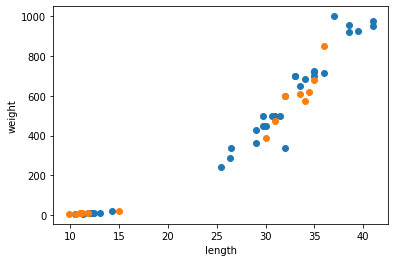

In [40]:
import matplotlib.pyplot as plt
plt.scatter(train_input[:,0], train_input[:,1])
plt.scatter(test_input[:,0], test_input[:,1])
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

두 번째 머신러닝 프로그램

In [42]:
kn = kn.fit(train_input, train_target)

In [44]:
kn.score(test_input, test_target)

1.0

In [46]:
kn.predict(test_input)

array([0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0])

In [49]:
test_target

array([0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0])

**2-2 데이터 전처리**

In [51]:
np.column_stack(([1,2,3],[4,5,6]))

array([[1, 4],
       [2, 5],
       [3, 6]])

In [55]:
fish_data = np.column_stack((fish_length, fish_weight))
print(fish_data[:5])

[[ 25.4 242. ]
 [ 26.3 290. ]
 [ 26.5 340. ]
 [ 29.  363. ]
 [ 29.  430. ]]


In [58]:
fish_target = np.concatenate((np.ones(35), np.zeros(14))) #원하는 개수의 1과 0을 채운 배열을 만들어줌
print(fish_target)

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0.]


사이킷런으로 훈련 세트와 테스트 세트 나누기

In [60]:
from sklearn.model_selection import train_test_split

In [63]:
#fish_data와 fish_target 2개의 배열을 전달했으므로, 2개씩 나뉘어 총 4개의 배열이 반환
#처음 2개는 입력 데이터(train_input, test_input), 나머지 2개는 타깃 데이터(train_target, test_target)임
#random_state 매개변수로 랜덤시드를 지정할 수 있음
train_input, test_input, train_target, test_target = train_test_split(fish_data, fish_target, random_state=42) 

In [65]:
print(train_input.shape, test_input.shape)

(36, 2) (13, 2)


In [66]:
print(train_target.shape, test_target.shape)

(36,) (13,)


In [68]:
print(test_target)

[1. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [71]:
train_input, test_input, train_target, test_target = train_test_split(fish_data, fish_target, stratify=fish_target, random_state=42)
print(test_target)

[0. 0. 1. 0. 1. 0. 1. 1. 1. 1. 1. 1. 1.]


**수상한 도미 한마리**

In [74]:
kn = KNeighborsClassifier()
kn.fit(train_input, train_target)
kn.score(test_input, test_target)

1.0

In [76]:
print(kn.predict([[25,150]]))

[0.]


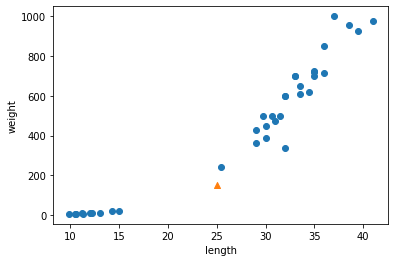

In [79]:
plt.scatter(train_input[:,0], train_input[:,1])
plt.scatter(25, 150, marker='^') #marker 매개변수는 모양 지정
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [82]:
distances, indexes = kn.kneighbors([[25,150]])

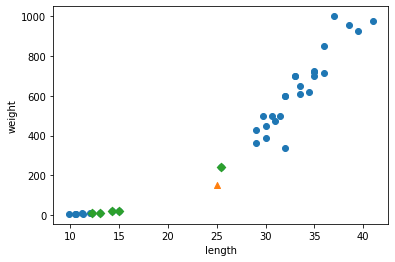

In [85]:
#KNeighborsClassifier 클래스는 가장 가까운 이웃을 찾아주는 kneighbors()메서드를 제공함
#marker= 'D'는 다이아몬드 모양
plt.scatter(train_input[:,0], train_input[:,1])
plt.scatter(25, 150, marker= '^')
plt.scatter(train_input[indexes,0], train_input[indexes,1], marker='D')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [87]:
print(train_input[indexes])

[[[ 25.4 242. ]
  [ 15.   19.9]
  [ 14.3  19.7]
  [ 13.   12.2]
  [ 12.2  12.2]]]


In [89]:
print(train_target[indexes])

[[1. 0. 0. 0. 0.]]


In [91]:
print(distances)

[[ 92.00086956 130.48375378 130.73859415 138.32150953 138.39320793]]


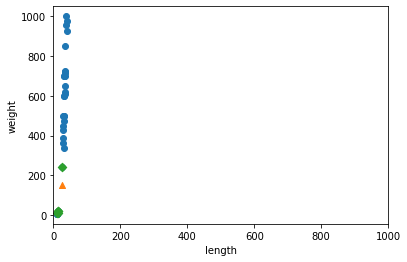

In [99]:
plt.scatter(train_input[:,0], train_input[:,1])
plt.scatter(25, 150, marker = '^')
plt.scatter(train_input[indexes,0], train_input[indexes,1], marker='D')
plt.xlim(0,1000) #x축 범위를 지정하기 위해
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

#x축과 y축의 범위를 동일하게 맞추었더니, 모든 데이터가 수직으로 늘어선 형태가 됨
# x축(생선의 길이)는 가장 가까운 이웃을 찾는데 크게 영향을 미치지 못함
#y축(생선의 무게)민 고려대상이 됨

생선의 길이와 생선의 무게의 값이 놓인 범위가 다르다. 

이를 두 특성의 스케일이 다르다고 한다. 

데이터를 표현하는 기준이 다르면 알고리즘이 올바르게 예측할 수 없으며, 특히 거리기반 알고리즘일 때 더욱 그렇다.

이런 알고리즘들은 샘플 간의 거리에 영향을 많이 받으므로 제대로 사용하려면 특성값을 일정한 기준으로 맞추어 줘야한다.

이 작업을 **데이터 전처리**(Data preprocessing) 라고 한다

가장 널리 사용하는 방법 중 하나는 표준점수이다(z점수).

평균을 빼고 표준편차를 나누어 주면 된다.

In [102]:
#axis=0 은 행을 따라서 각 열의 통계 값을 계산한다.
mean = np.mean(train_input, axis=0)
std = np.std(train_input, axis=0)
print(mean, std)

[ 27.29722222 454.09722222] [  9.98244253 323.29893931]


In [103]:
train_scaled = (train_input - mean) / std

**전처리 데이터로 모델 훈련하기**

<function matplotlib.pyplot.show>

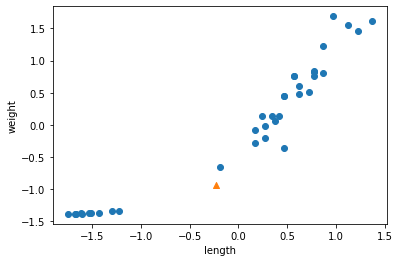

In [110]:
"""
plt.scatter(train_scaled[:,0], train_scaled[:,1])
plt.scatter(25, 150, marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()
"""

new= ([25,150] - mean) / std
plt.scatter(train_scaled[:,0], train_scaled[:,1])
plt.scatter(new[0], new[1], marker= '^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show

In [112]:
kn.fit(train_scaled, train_target)

KNeighborsClassifier()

In [117]:
test_scaled = (test_input - mean) / std
print(kn.predict([new]))

[1.]


<function matplotlib.pyplot.show>

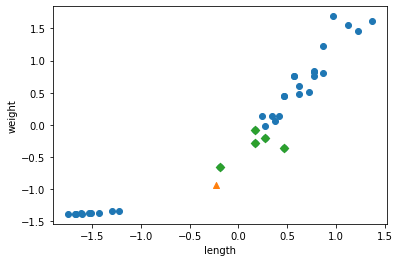

In [121]:
distances, indexes = kn.kneighbors([new])
plt.scatter(train_scaled[:,0], train_scaled[:,1])
plt.scatter(new[0], new[1], marker='^')
plt.scatter(train_scaled[indexes,0], train_scaled[indexes,1], marker='D')
plt.xlabel('length')
plt.ylabel('weight')
plt.show